In [2]:
import imp; import utils; imp.reload(utils);
from utils import *; import numpy as np;
import pandas as pd; import math; import time;
from copy import deepcopy
from sklearn.metrics import confusion_matrix, recall_score, precision_score,f1_score,accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, recall_score, precision_score,f1_score,accuracy_score
from sklearn.linear_model import LogisticRegression
train_set = pd.read_csv('mnist_train.csv'); test_set = pd.read_csv('mnist_test.csv')
xtr = train_set.iloc[:, 1:785].values;  ytr = train_set.iloc[:, 0].values
xte = test_set.iloc[:, 1:785].values;    yte= test_set.iloc[:, 0].values

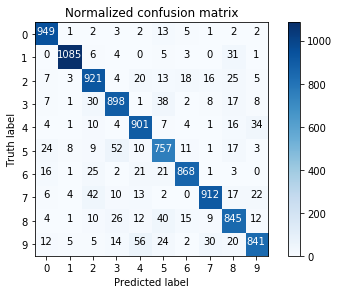

0.897700


<Figure size 432x288 with 0 Axes>

In [4]:
import pandas as pd
name_list = [[0,1],[0,2],[0,3],[0,4],[0,5],[0,6],[0,7],[0,8],[0,9],[1,2],[1,3],[1,4],[1,5],[1,6],
             [1,7],[1,8],[1,9],[2,3],[2,4],[2,5],[2,6],[2,7],[2,8],[2,9],[3,4],[3,5],[3,6],[3,7],
             [3,8],[3,9],[4,5],[4,6],[4,7],[4,8],[4,9],[5,6],[5,7],[5,8],[5,9],[6,7],[6,8],[6,9],
             [7,8],[7,9],[8,9]]
df = pd.read_csv('SR_7.csv')#acc_golden_5x5.csv#acc_nov29_25
df = df.drop(df.columns[0], axis=1)

scores = []
n = 10000
for i in range(n):
    score = [0] * 10
    for j in range(45):
        if df.iloc[i,j] < 1.5: 
            score[name_list[j][0]] += 1 
        else:
            score[name_list[j][1]] += 1   
    scores.append(score)
    
y_cad  = []

for i in range(n):
    Max = 0 
    guess = 0 
    for j in range(10):
        if int(scores[i][j]) > Max:
            Max  =  scores[i][j]
            guess = j
            
    y_cad.append(guess) 
        
yt = yte[0:n]
# yp = y_pred[0:n]
cm=confusion_matrix(yt, y_cad)
class_names=['0', '1','2','3','4','5','6','7','8','9']
plt.figure()

plot_confusion_matrix(cm, classes=class_names, normalize=False,
                     title='Normalized confusion matrix',cmap=plt.cm.Blues)  
plt.savefig('conf_python.png',dpi=500)
plt.show()
acc = round(accuracy_score(yt, y_cad) *100)
print("%f"%accuracy_score(yt, y_cad))

# cm=confusion_matrix(yt, yp)
# class_names=['0', '1','2','3','4','5','6','7','8','9']
# plt.figure()

# plot_confusion_matrix(cm, classes=class_names, normalize=False,
#                      title='Normalized confusion matrix',cmap=plt.cm.Blues)  
plt.savefig('conf_python.png',dpi=500)
plt.show()
# print(accuracy_score(yt, yp))